In [25]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


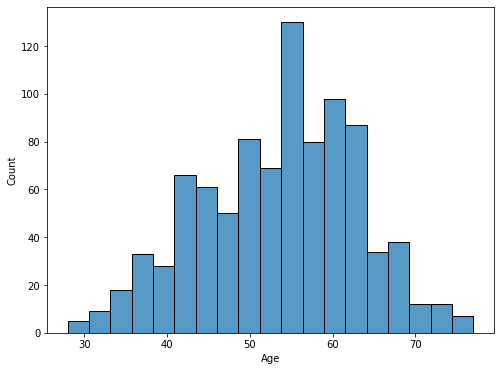

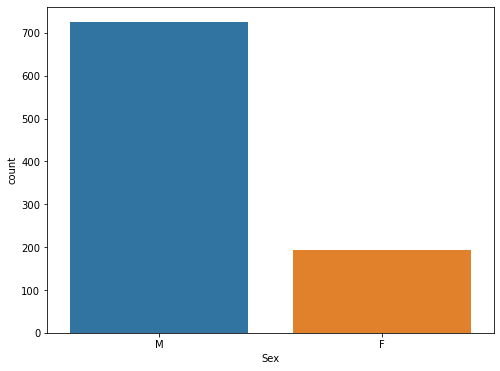

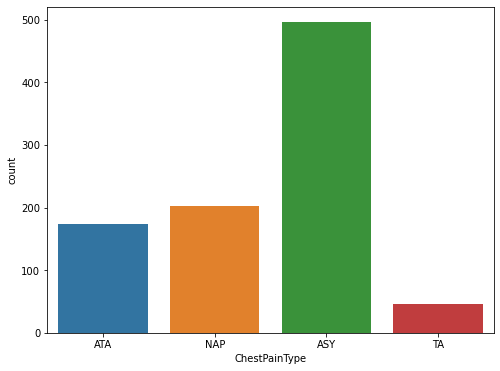

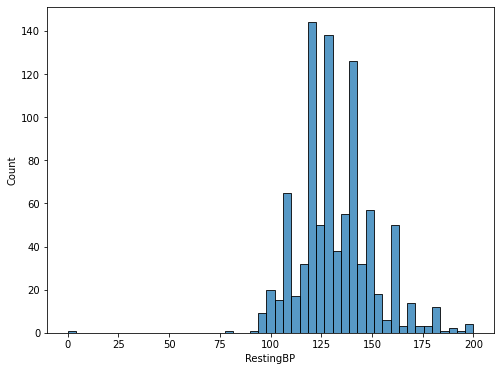

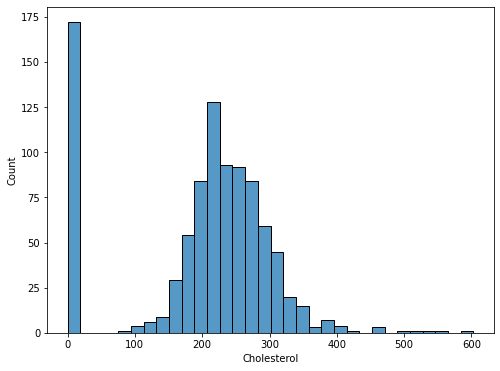

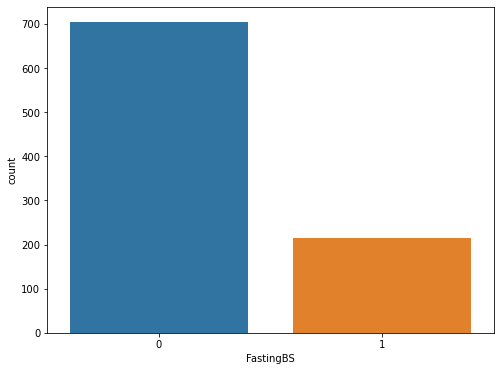

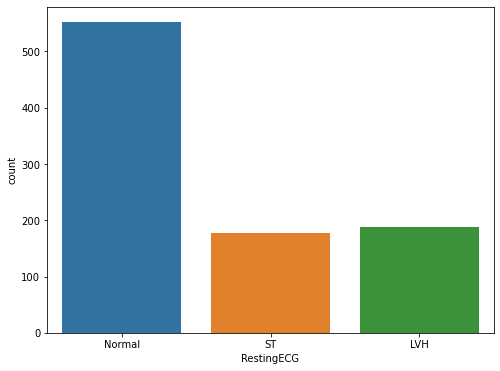

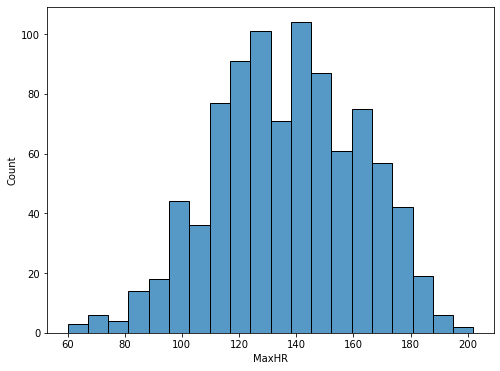

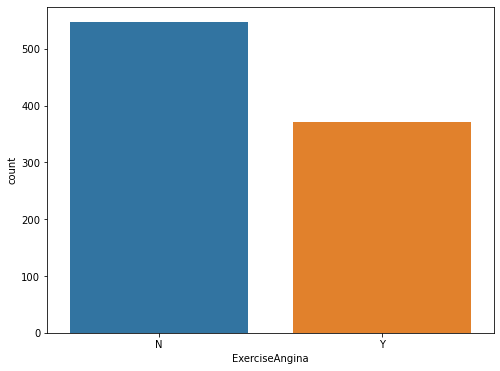

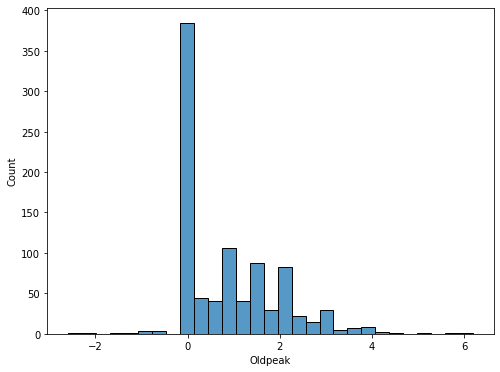

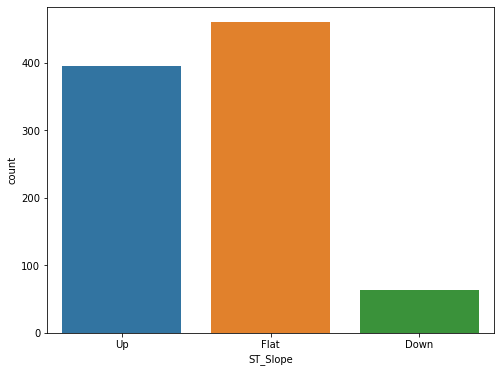

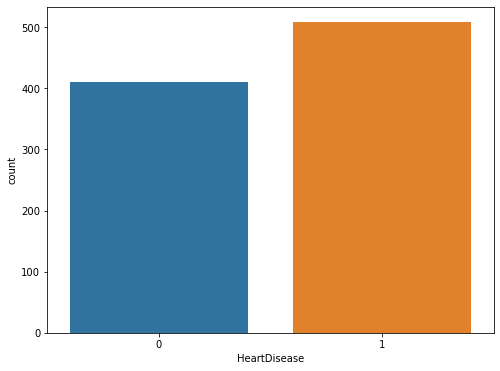

In [14]:
for column in df.columns.tolist():

    plt.figure(figsize = (8,6))

    if df[column].nunique() > 10:

        sns.histplot(x = df[column])

    else:

        sns.countplot(x = df[column])

    plt.show()

How many values do we have with cholesterol == 0?

In [20]:
print(f"Values where cholesterol is zero: {len(df[df.Cholesterol == 0])}")

Values where cholesterol is zero: 172


In [22]:
df.loc[df.Cholesterol == 0,'Cholesterol'] = np.nan

In [53]:
columns_to_encode = df.select_dtypes(include = object).columns.tolist()

column_transformer = make_column_transformer(

        (OrdinalEncoder(dtype = int),['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']),
        (SimpleImputer(),['Cholesterol']),
        remainder='passthrough'
                                            )

test = pd.DataFrame(column_transformer.fit_transform(df).astype(int),columns = df.columns.tolist())

In [54]:
column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'int'>),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope']),
                                ('simpleimputer', SimpleImputer(),
                                 ['Cholesterol'])])

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

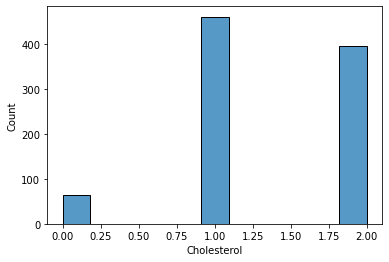

In [48]:
sns.histplot(test.Cholesterol)